## Introduction to 

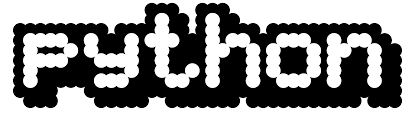

### In this note book we will: 
* Import libraries
* Load data into a data frame
* Write a line of code to change the name of a file in a folder 
* Write a loop to rename all the files within a folder 

The goal is to become familiar with some syntax and how to build a simple line of code into a 'production line' for the repetitive tasks you do.

## Part one: Importing or installing Python Libraries 

 Your Python IDE, or integrated development environment, comes with lots of libraries already installed that just need to be imported into your script. To do this you need to type 'import library as alias' or, if you know you only need one module you can 'import library.module as alias'. The syntax is straightforward. You may need to google which library you need and check the documentation on how to use it.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")

Installing a library takes a little more effort. First off - we are working in the base environment right now. This is the OG standard installation of your Python with the core system libraries and depedencies of Conda. When you start installing additional libraries, they can conflict with existing ones or they may require a specific version of Python. To avoid 'breaking the base' or other issues it is good practice to create a new environment "env" for your script. This also makes it easier to share your code as other programmers can get your script and the env that runs it. Before we install anything new - lets make a new env
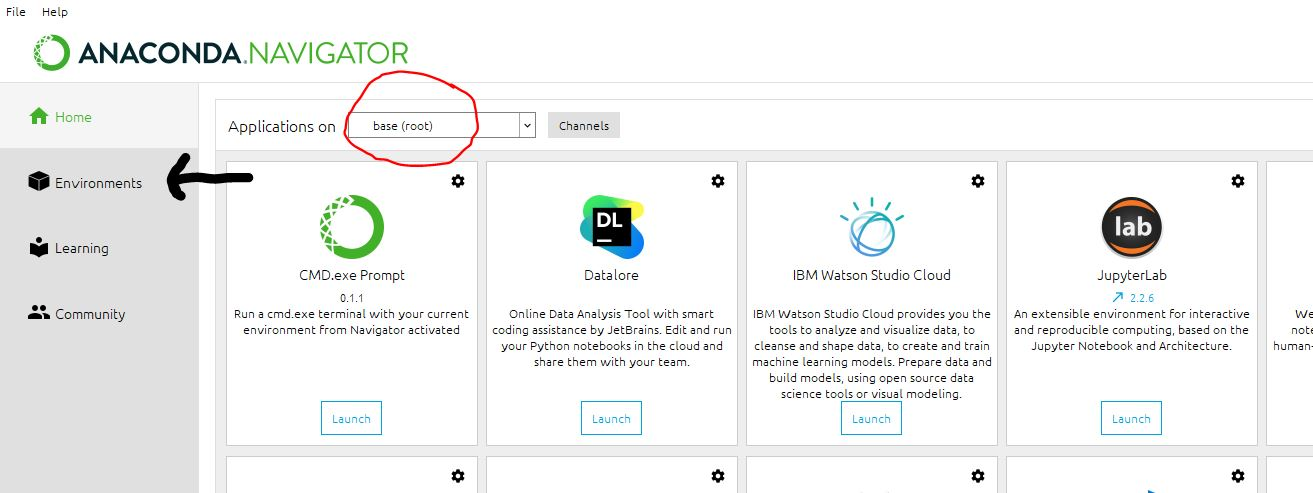


To do this, go to your main Anaconda page. Navigate to the Environments tab on the left of the home page. When you click here you will see all the env's you have created in a list on the left and a view of all the libraries that each env has imported currently on the right. At the bottom of the page, you can click on ' Create'. A window will pop up where you can name your env, choose the language: R or Python, and choose the version. We will call ours test_env and leave the rest as is. 

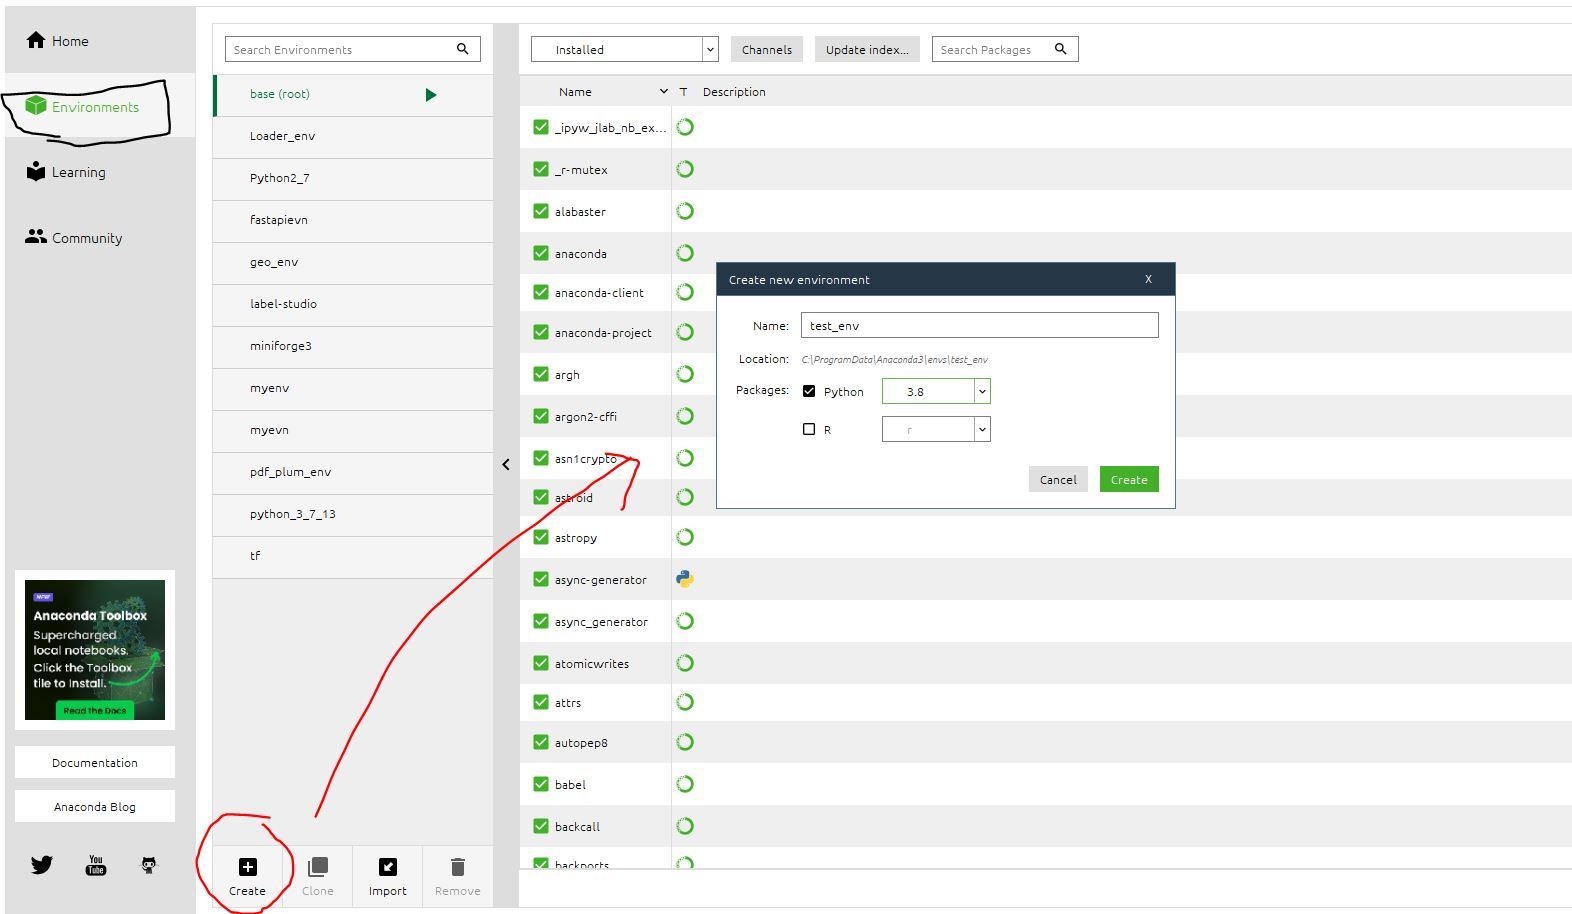

The last thing to do is to switch to this env - Just click on it and wait. Any library you imported or installed in the notebook before this point with need to be reimported or installed.

Installing a library now is easy - just type conda install library as we are in the Anaconda IDE, other syntax includes pip install but you won't need this for our purposes today.


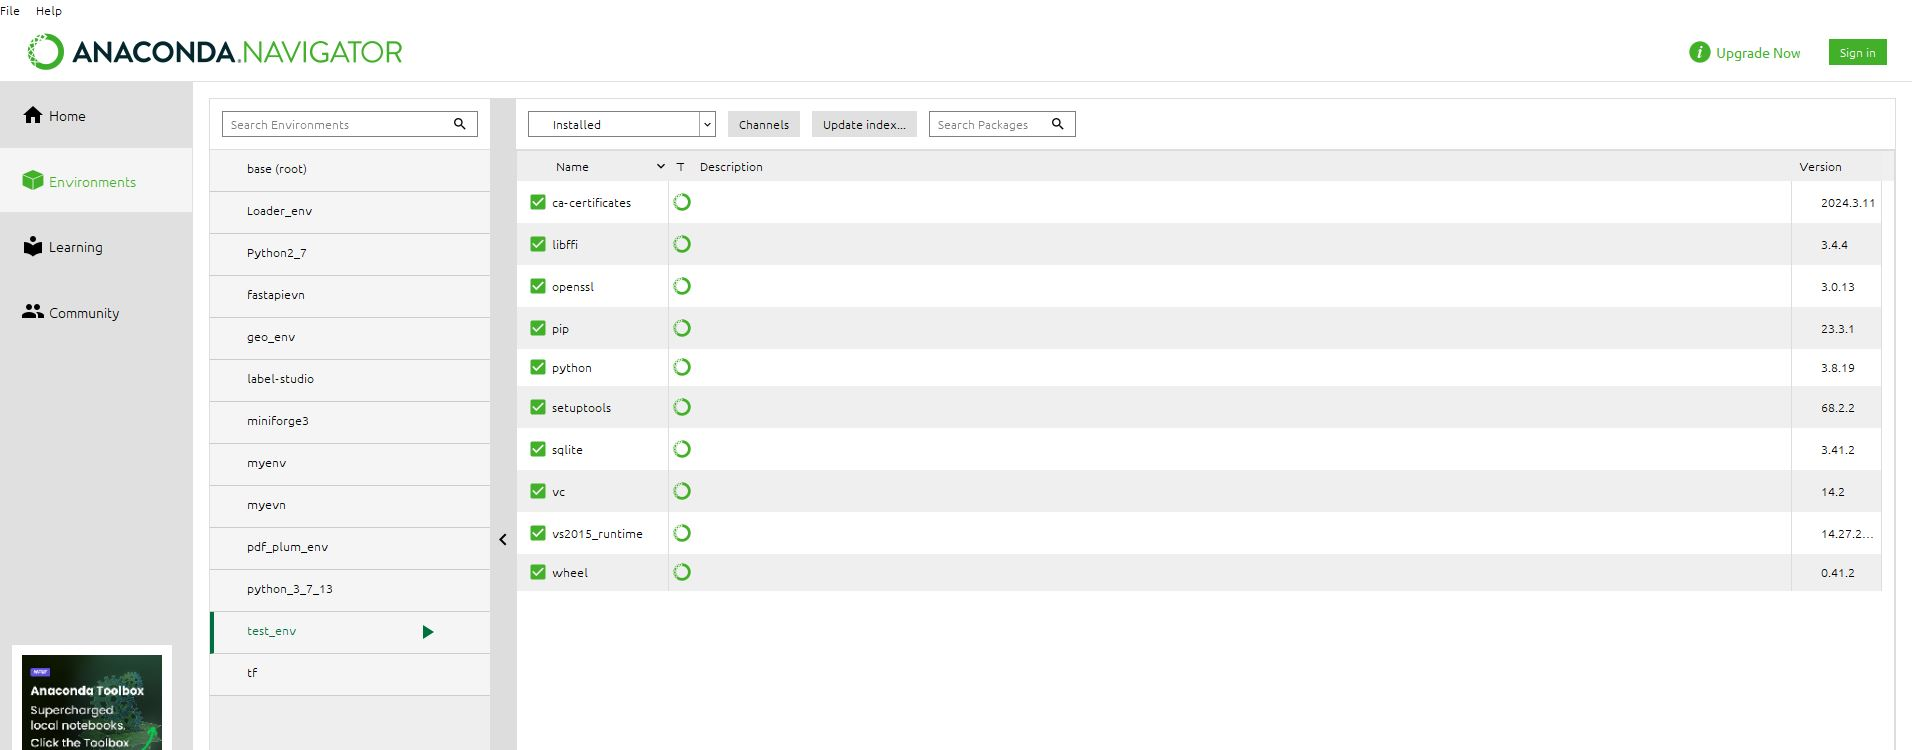

You can also import some libraries from the Environment tab by searching for them and clicking a button - this list is not everything available but check here first to make your life easier. 

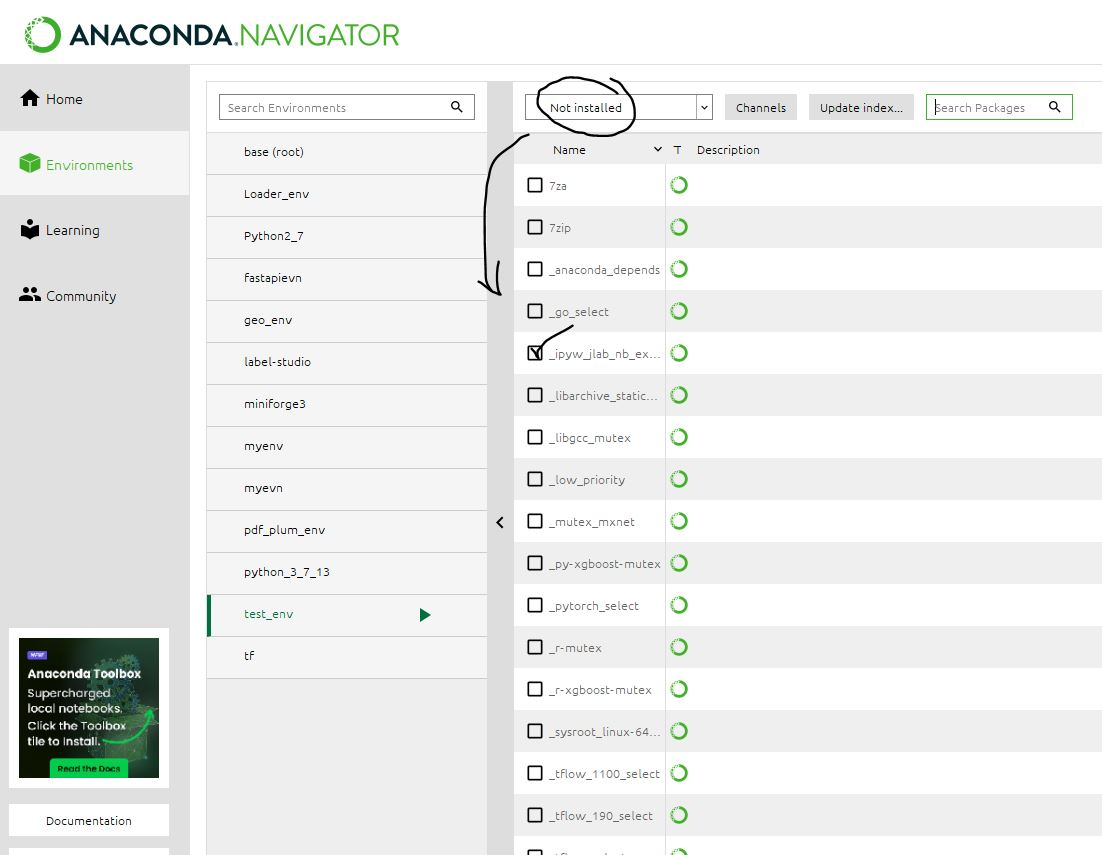

## Part Two: Let's make a data frame!

Now that we have the libraries we need - lets load a .csv file and have a look at the data.

In [3]:
df = pd.read_csv(r'C:\Users\padams\OneDrive - CGG\intro to py\data\database.csv')

let's have a look at this earthquake data we just loaded into our notebook. There is a lot of data and a lot we could learn from this using Python, but for today we will just do a basic data cleaning and plot a few things just to show the power of Python. 
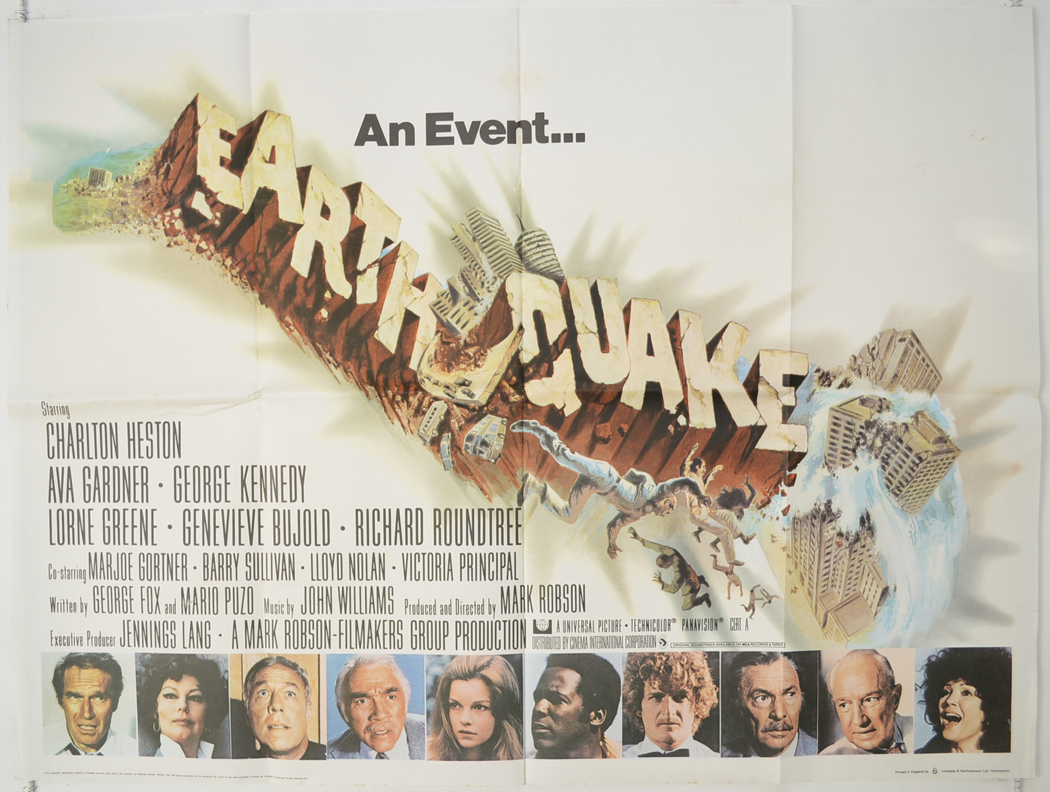

By using the .head() method on the df was can retrieve as many rows as we like to get a feel for it - Here I just grabbed 3 rows

In [49]:
df.head(3)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic


Let's check out the date and time columns or errors - we can get some idea if there are errors or not with some clever python. Let's look at the lengths of the objects in the Date column:

In [4]:
#Parsing datetime
#exploring the length of date objects
lengths = df["Date"].str.len()
lengths.value_counts()

Date
10    23409
24        3
Name: count, dtype: int64

Here I introduce comments - using a # before adding text in a code cell allows you to add some context to your code for others to read

np.where(): This function in NumPy returns the indices of elements in an array that satisfy a certain condition. It takes a condition as an argument and returns a tuple of arrays containing the indices where the condition is true.

[lengths == 24]: This is the condition inside np.where(). It checks whether each element in the array lengths is equal to 24. This results in a boolean array where each element is True if the corresponding element in lengths is equal to 24, and False otherwise.

np.where([lengths == 24]): This evaluates the condition and returns a tuple containing the indices where the condition is true. In this case, since it's a boolean array, it returns the indices where the value is True.

[1]: This selects the second element of the tuple returned by np.where(). In Python, indexing starts from 0, so [1] selects the second element. This element contains the indices where the condition lengths == 24 is true.

In [6]:
#having a look at the long data points
wrongdates = np.where([lengths == 24])[1]
print("Fishy dates:", wrongdates)
df.loc[wrongdates]

Fishy dates: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [7]:
#fixing the wrong dates and changing the datatype from numpy object to datetime64[ns]
df.loc[3378, "Date"] = "02/23/1975"  
df.loc[7512, "Date"] = "04/28/1985"
df.loc[20650, "Date"] = "03/13/2011"
df['Date']= pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        23412 non-null  datetime64[ns]
 1   Time                        23412 non-null  object        
 2   Latitude                    23412 non-null  float64       
 3   Longitude                   23412 non-null  float64       
 4   Type                        23412 non-null  object        
 5   Depth                       23412 non-null  float64       
 6   Depth Error                 4461 non-null   float64       
 7   Depth Seismic Stations      7097 non-null   float64       
 8   Magnitude                   23412 non-null  float64       
 9   Magnitude Type              23409 non-null  object        
 10  Magnitude Error             327 non-null    float64       
 11  Magnitude Seismic Stations  2564 non-null   float64   

In [8]:
#We have time data too. Now that we are at it,lets parse it as well. 
#exploring the length of time objects
lengths = df["Time"].str.len()
lengths.value_counts()

Time
8     23409
24        3
Name: count, dtype: int64

In [54]:
#Having a look at the fishy datapoints
wrongtime = np.where([lengths == 24])[1]
print("Fishy time:", wrongtime)
df.loc[wrongtime]

Fishy time: [ 3378  7512 20650]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


In [9]:
#Ah! Is it deja vu or are those the same datapoints
#fixing the wrong time and changing the datatype from numpy object to timedelta64[ns]
df.loc[3378, "Time"] = "02:58:41"
df.loc[7512, "Time"] = "02:53:41"
df.loc[20650, "Time"] = "02:23:34"
df['Time']= pd.to_timedelta(df['Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   Date                        23412 non-null  datetime64[ns] 
 1   Time                        23412 non-null  timedelta64[ns]
 2   Latitude                    23412 non-null  float64        
 3   Longitude                   23412 non-null  float64        
 4   Type                        23412 non-null  object         
 5   Depth                       23412 non-null  float64        
 6   Depth Error                 4461 non-null   float64        
 7   Depth Seismic Stations      7097 non-null   float64        
 8   Magnitude                   23412 non-null  float64        
 9   Magnitude Type              23409 non-null  object         
 10  Magnitude Error             327 non-null    float64        
 11  Magnitude Seismic Stations  2564 non-null

In [10]:
#Now that we have Date, Time (and Date_Time) we should have Days of week too. 
df["Days"]= df.Date.dt.strftime("%A")

In [11]:
df.head(3)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Days
0,1965-01-02,0 days 13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Saturday
1,1965-01-04,0 days 11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Monday
2,1965-01-05,0 days 18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Tuesday


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   Date                        23412 non-null  datetime64[ns] 
 1   Time                        23412 non-null  timedelta64[ns]
 2   Latitude                    23412 non-null  float64        
 3   Longitude                   23412 non-null  float64        
 4   Type                        23412 non-null  object         
 5   Depth                       23412 non-null  float64        
 6   Depth Error                 4461 non-null   float64        
 7   Depth Seismic Stations      7097 non-null   float64        
 8   Magnitude                   23412 non-null  float64        
 9   Magnitude Type              23409 non-null  object         
 10  Magnitude Error             327 non-null    float64        
 11  Magnitude Seismic Stations  2564 non-null

##### Now that we have dates and times we can rely on - lets make a quick plot of earthquakes over the years by magnitude  

Text(0.5, 0, 'Date')

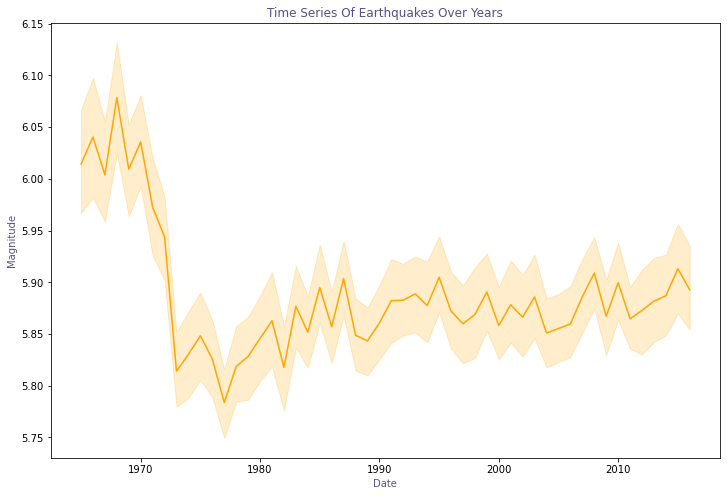

In [59]:
plt.figure(figsize=(12,8))
Time_series=sns.lineplot(x=df['Date'].dt.year,y=df["Magnitude"], data=df, color="#ffa600")
Time_series.set_title("Time Series Of Earthquakes Over Years", color="#58508d")
Time_series.set_ylabel("Magnitude", color="#58508d")
Time_series.set_xlabel("Date", color="#58508d")

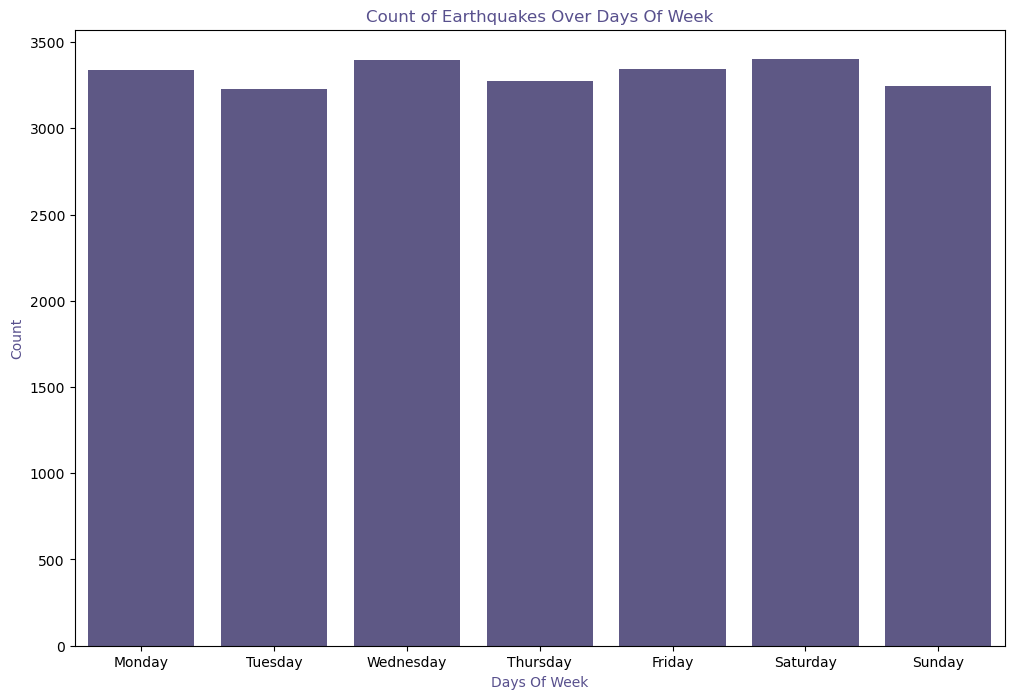

In [26]:
earthquake_data = df[df['Type'] == 'Earthquake']

# Define the order of days of the week
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 8))
    
Days_of_week = sns.countplot(x=earthquake_data['Days'], data=earthquake_data, order=order, color="#58508d")
Days_of_week.set_title("Count of Earthquakes Over Days Of Week", color="#58508d")
Days_of_week.set_ylabel("Count", color="#58508d")
Days_of_week.set_xlabel("Days Of Week", color="#58508d")

plt.show()

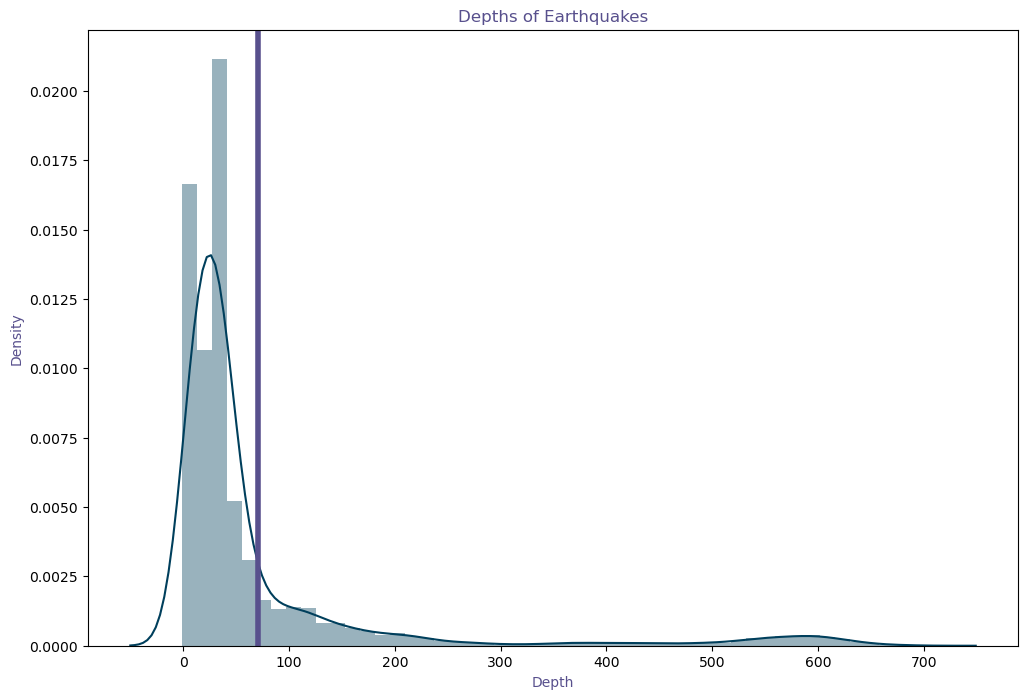

In [25]:
plt.figure(figsize=(12,8))
depth = df["Depth"].values
mean_D= df["Depth"].mean()
Depth_plot = sns.distplot(depth, color ="#003f5c")
Depth_plot.set_title("Depths of Earthquakes", color="#58508d")
Depth_plot.set_ylabel("Density", color="#58508d")
Depth_plot.set_xlabel("Depth", color="#58508d")

plt.axvline(mean_D,0,1, color="#58508d",linewidth=4,label="Mean")

#### There's loads we can do with this type of data - but lets get back to the point

## Part Three: Renaming Files

###### What we want to do now is take a file and rename it. In code we can do it like this:
First we need to import the relevant libraries into our notebook:

In [27]:
import os
import random
import string 

calling the os .rename method on the file, we can add a new name:

In [61]:
os.rename('old_file.csv', 'new_file.csv') 

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'old_file.csv' -> 'new_file.csv'

In [67]:
os.rename(r"C:\Users\padams\OneDrive - CGG\intro to py\data\old_file_name.JPG", r"C:\Users\padams\OneDrive - CGG\intro to py\data\new_name_o.JPG")

if we want to rename a bunch of files in a folder - we can turn this line of code above into a sort of conveyor belt with a for loop:

In [63]:
folder_path = r'folder_path'

In [64]:
folder_path = r"C:\Users\padams\OneDrive - CGG\intro to py\data\folder_o_files"

In [65]:
for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        file_name, file_extension = os.path.splitext(filename)
        random_name = ''.join(random.choices(string.ascii_letters + string.digits, k=6))
        new_filename = random_name + file_extension
        os.rename(os.path.join(folder_path, filename), os.path.join(folder_path, new_filename))

The final version would be to create a function that can be stored here or in another file in this project that we could import and call here, something like this:

In [66]:
def rename_files(folder_path, output_path):
    for filename in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, filename)):
            file_name, file_extension = os.path.splitext(filename)
            random_name = ''.join(random.choices(string.ascii_letters + string.digits, k=6))
            new_filename = random_name + file_extension
            os.rename(os.path.join(folder_path, filename), os.path.join(output_path, new_filename))

In [ ]:
rename_files(folder_path, output_path)